# Rossmann Store Sales

Rossmann is one of the largest drugstore chains in Germany, with operations across Europe. As of 2018, they have well over 3,900 stores in Europe with an annual turnover of 9 billion euros. 
### Our task is to predict the sales for a few identified stores on a given day.

We are going to develop an ML model that can learn the sales for a store as a function of internal, external, and temporal (time-based) attributes and then predict future sales given the attributes available.

## Problem Statement 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df  = pd.read_csv("train.csv")

C:\Users\Gulraiz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head()

Shape of the Dataset: (1017209, 9)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [4]:
store  = pd.read_csv("store.csv")
print("Shape of the Dataset:",store.shape)

#Display the first 5 rows of data using the head method of pandas dataframe
store.head(5)

Shape of the Dataset: (1115, 10)


Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [5]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [9]:
df_new.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Exploring Dataset

In [43]:
#How many stores do we have the data for?
print("Distinct number of Stores :", len(df_new["Store"].unique()))

#How long do we have the data for?
print("Distinct number of Days :", len(df_new["Date"].unique()))

#What do the average sales for a day look like?
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


## Finding Data Types

In [7]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

## Working with Time

In [8]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [ ]:
df_new["Date"] = pd.to_datetime(df_new["Date"])
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
                        np.where(df_new["Month"].isin([6,7,8]),"Summer",
                            np.where(df_new["Month"].isin([9,10,11]),"Fall",
                                np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))


In [11]:
#Using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


## Predicting Sales

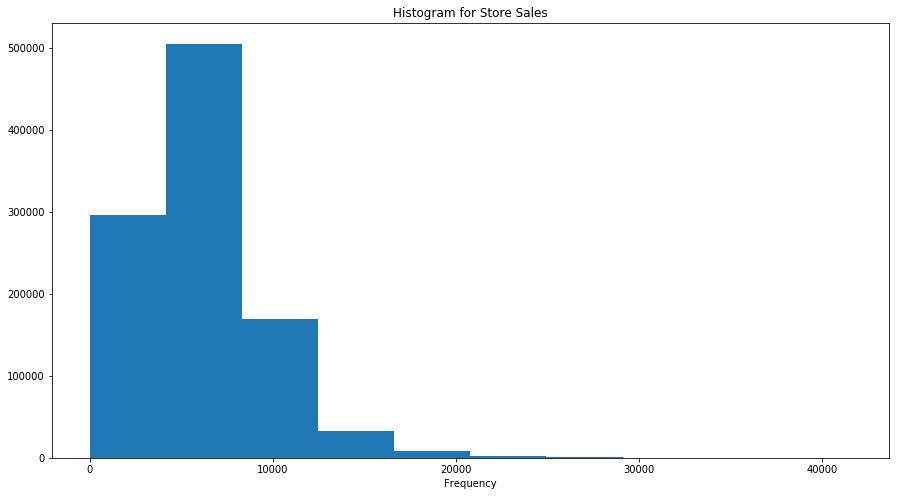

In [12]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df_new["Sales"])  
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

## Exploring Numeric Columns

In [13]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EA23709E8>,
      dtype=object)

### Checking missing data in dataset

In [14]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [15]:
#Replace nulls with the mode
df_new["CompetitionDistance"]= df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

In [16]:
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

## Understanding the Categorical Features

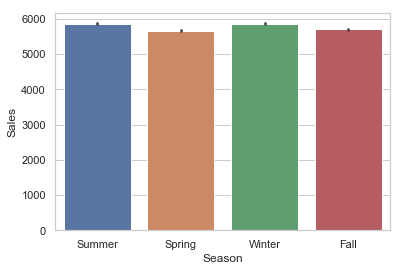

In [17]:
import seaborn as sns  #Seaborn is another powerful visulization library for Python
sns.set(style="whitegrid")

#Create the bar plot for Average Sales acrss different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

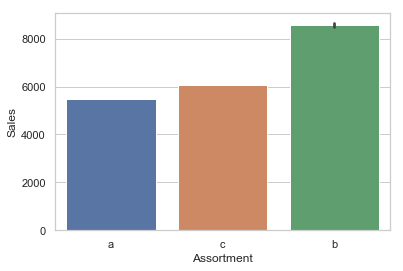

In [18]:
#Create the bar plot for Average Sales acrss different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

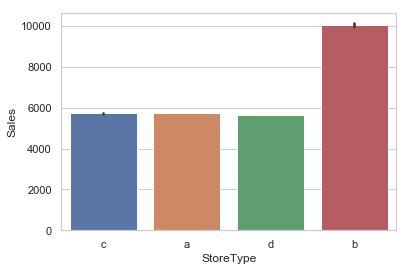

In [19]:
#Create the bar plot for Average Sales acrss different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

In [20]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size)

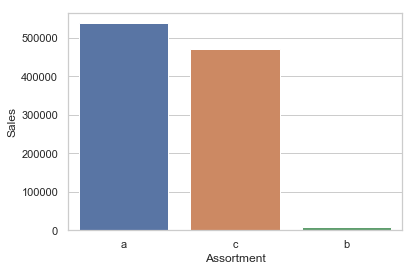

In [21]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size)

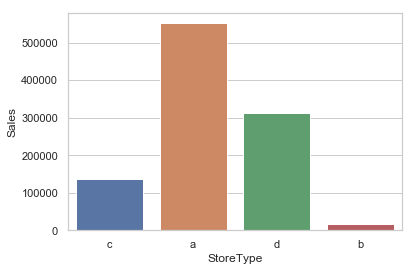

In [22]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

## Data Engineering

In [23]:
#Define a variable for each type of feature
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

In [24]:
#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [25]:
#Since the above function coverts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

C:\Users\Gulraiz\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Gulraiz\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

In [26]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


As you can see, the shape of the data looks good with the new one-hot encoded form of data, but there is at least one column that has object as the data type within our dataframe. Let’s check which column is still pending for data treatment.

In [27]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [28]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

The feature seems to have incorrect values. Ideally, StateHoliday should have either a 0 or 1 as the possible values to indicate whether it is a holiday or not. Let’s repair the feature by replacing all values of “a,” “b,” and “c” with 1 and the rest with 0, therefore converting the variable as numeric.

In [29]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check the data tpye
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

### TRAIN_TEST_SPLIT

In [30]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)

#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

In [31]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


## Creating Baseline Accuracy

In [32]:
#calcualte the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [33]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


So, our baseline performance is 2,883.58. If our DL model doesn’t deliver results better (i.e., lower) than the baseline score, then it would barely add any value

## Designing the DNN

In [34]:
#Create Deep Neural Network Architecuture
from keras import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam', loss="mean_absolute_error", metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Using TensorFlow backend.








Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 82s 112us/step - loss: 956.7188 - mean_absolute_error: 956.7188 - val_loss: 832.6774 - val_mean_absolute_error: 832.6774
Epoch 2/10
732390/732390 [==============================] - 77s 105us/step - loss: 786.0352 - mean_absolute_error: 786.0352 - val_loss: 756.2800 - val_mean_absolute_error: 756.2800
Epoch 3/10
732390/732390 [==============================] - 77s 105us/step - loss: 742.8131 - mean_absolute_error: 742.8131 - val_loss: 735.5273 - val_mean_absolute_error: 735.5273
Epoch 4/10
732390/732390 [==============================] - 74s 100us/step - loss: 724.1615 - mean_absolute_error: 724.1615 - val_loss: 716.7812 - val_mean_absolute_error: 716.7812
Epoch 5/10
732390/732390 [==============================] - 74s 100us/step - loss: 712.5848 - mean_absolute_error: 712.5848 - val_loss: 699.0271 - val_mean_absolute_error: 699.0271
Epoch 6/10
732390/732390 [============

## Testing the Model Performance

In [35]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 11s 53us/step
Metric  loss : 690.66
Metric  mean_absolute_error : 690.66


## Improving the Model

In [36]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 95s 129us/step - loss: 1743867.9073 - mean_absolute_error: 853.8705 - val_loss: 1425314.7554 - val_mean_absolute_error: 829.3042
Epoch 2/10
732390/732390 [==============================] - 96s 131us/step - loss: 1135878.3935 - mean_absolute_error: 717.7996 - val_loss: 1041553.5397 - val_mean_absolute_error: 684.6687
Epoch 3/10
732390/732390 [==============================] - 100s 136us/step - loss: 1084998.3916 - mean_absolute_error: 700.2439 - val_loss: 1039434.3040 - val_mean_absolute_error: 683.5080
Epoch 4/10
732390/732390 [==============================] - 95s 130us/step - loss: 1050516.9114 - mean_absolute_error: 689.1223 - val_loss: 1076644.0307 - val_mean_absolute_error: 702.3994
Epoch 5/10
732390/732390 [==============================] - 96s 131us/step - loss: 1026060.2103 - mean_absolute_error: 681.5800 - val_loss: 1046874.4847 - val_mean_absolute_error: 704.4567
Epo

In [38]:
#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Metric  loss : 690.66
Metric  mean_absolute_error : 690.66


In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

In [ ]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

## Increasing the Number of Neurons

In [ ]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

In [ ]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

## Training the model with increased number of epochs

In [ ]:
from keras.callbacks import History 
history = History()

model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), 
epochs=15,batch_size=64,callbacks=[history])

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

## Plotting the Loss Metric Across Epochs

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Testing the Model Manually

In [ ]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))